<a href="https://colab.research.google.com/github/vanshu1722/ADS-experiment/blob/main/ADS8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Make sure the 'housing.csv' file is accessible. If you're using Google Colab, you can upload the file using the file upload feature.
df = pd.read_csv('Housing.csv')

# Display the first few rows of the dataframe to understand what the data looks like
print(df.head())

# Generate and display summary statistics for the dataset
summary_stats = df.describe(include='all')
print("\n",summary_stats)

# For non-numeric columns, 'describe' doesn't show all stats, so you might want to see unique counts, top, and freq.
# Handling non-numeric data:
non_numeric_stats = df.describe(include=[object])
print("\n",non_numeric_stats)

# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

                price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02   

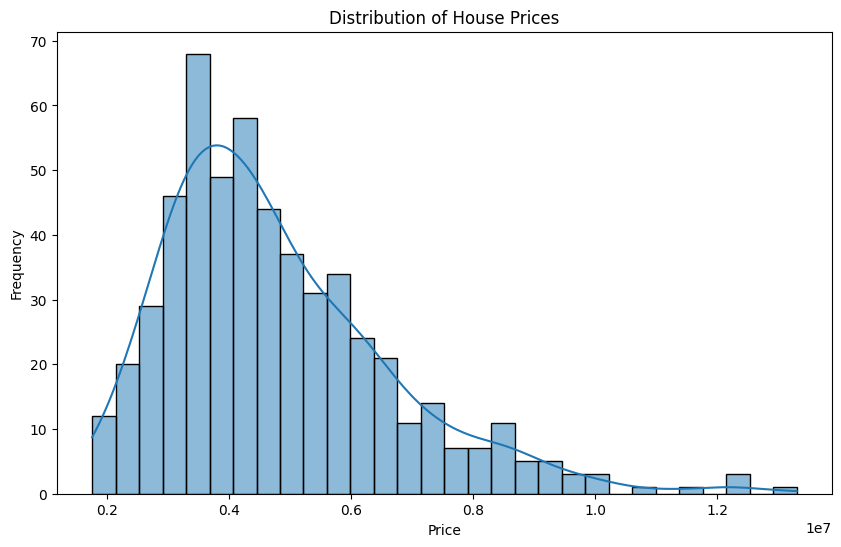

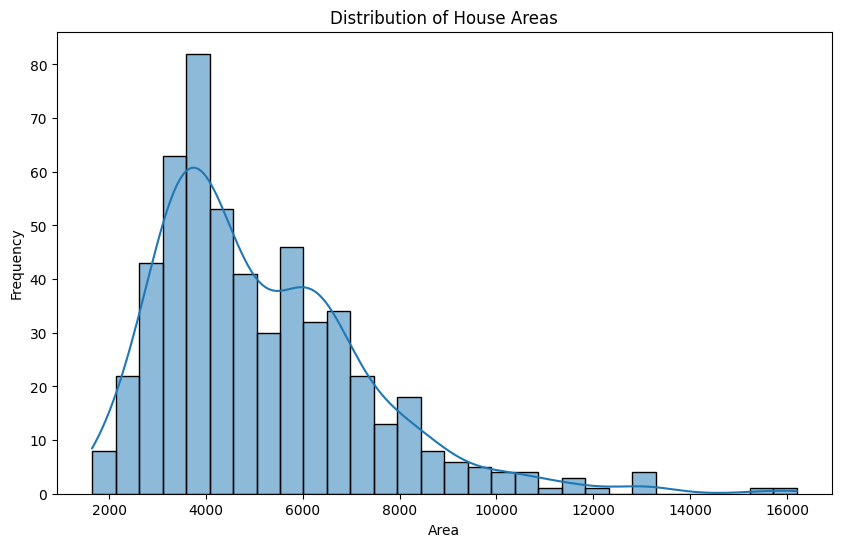

In [ ]:
# Histogram of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Histogram of area
plt.figure(figsize=(10, 6))
sns.histplot(df['area'], kde=True, bins=30)
plt.title('Distribution of House Areas')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()


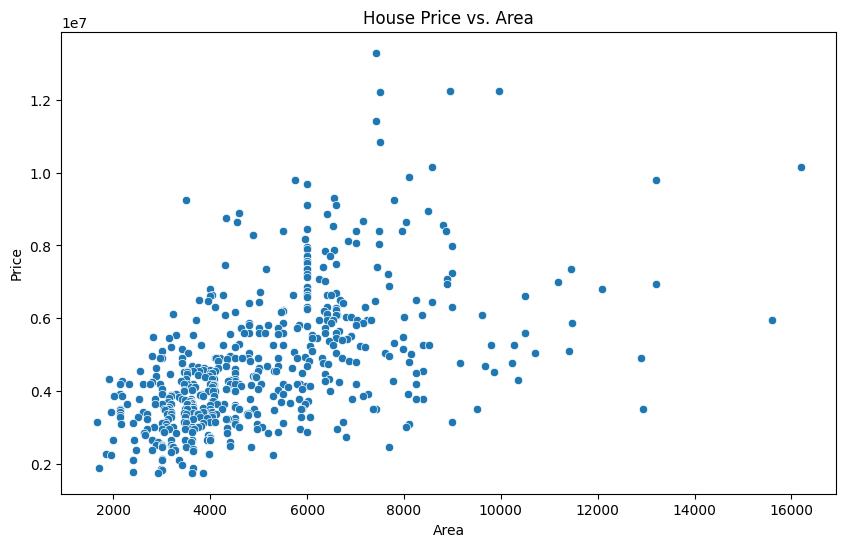

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('House Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


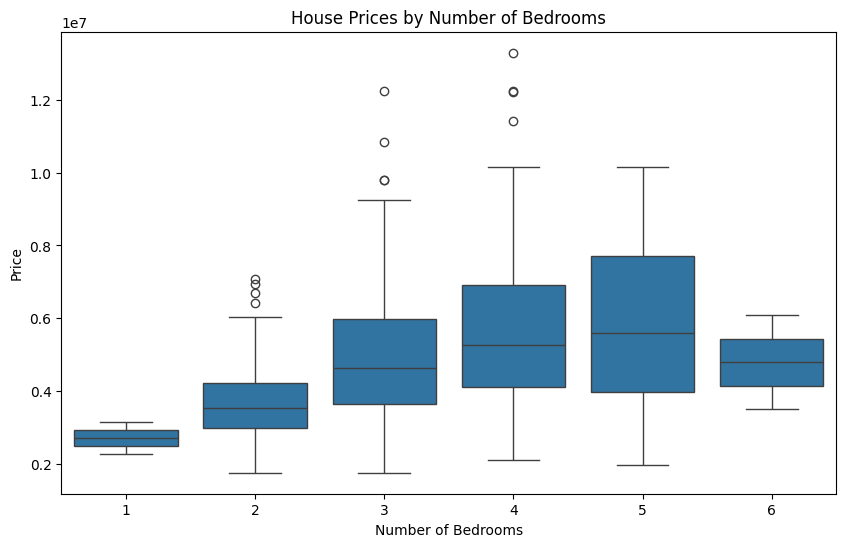

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('House Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


<ipython-input-8-452cf55472e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


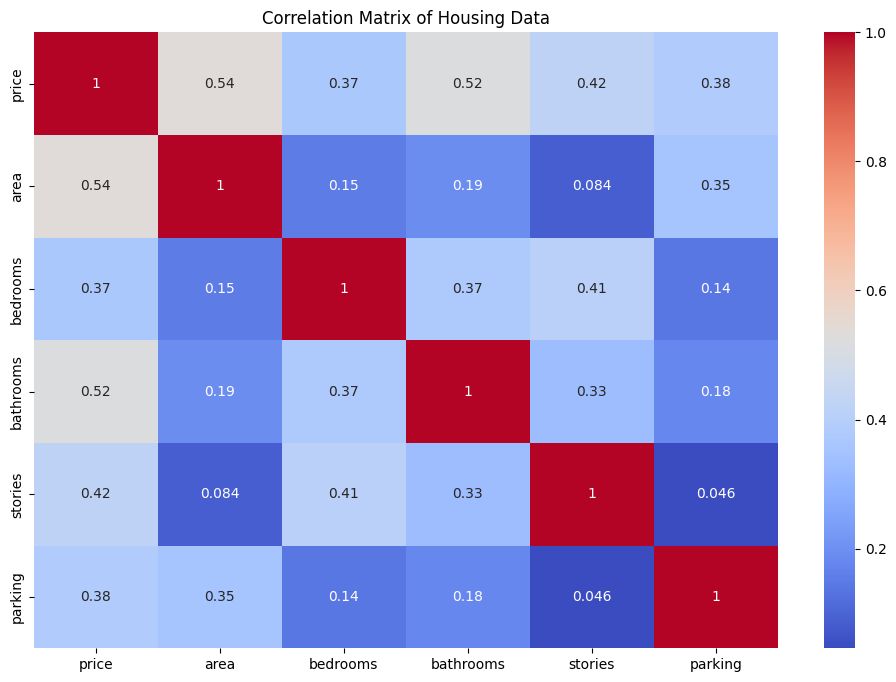

In [ ]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Housing Data')
plt.show()


Number of outliers in 'price': 15
Number of outliers in 'area': 12
Number of outliers in 'bedrooms': 12
Number of outliers in 'bathrooms': 1
Number of outliers in 'stories': 41
Number of outliers in 'parking': 12


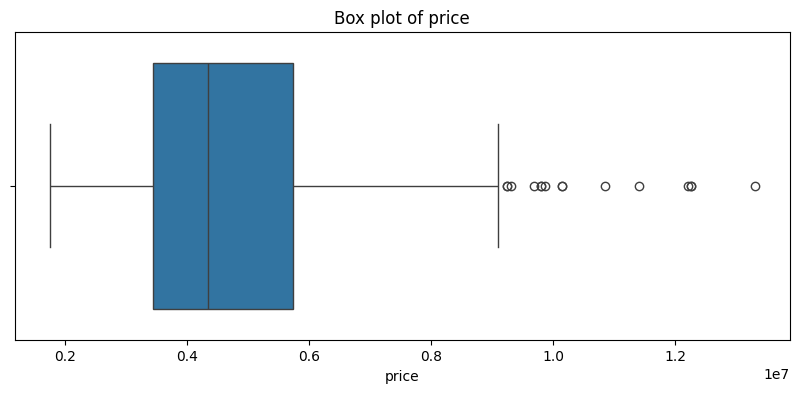

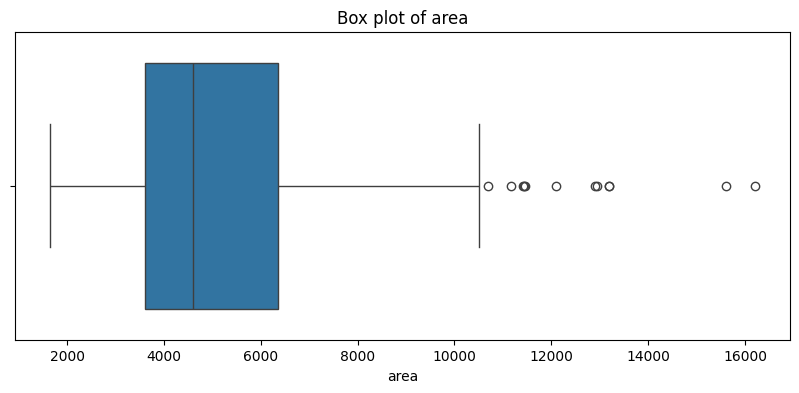

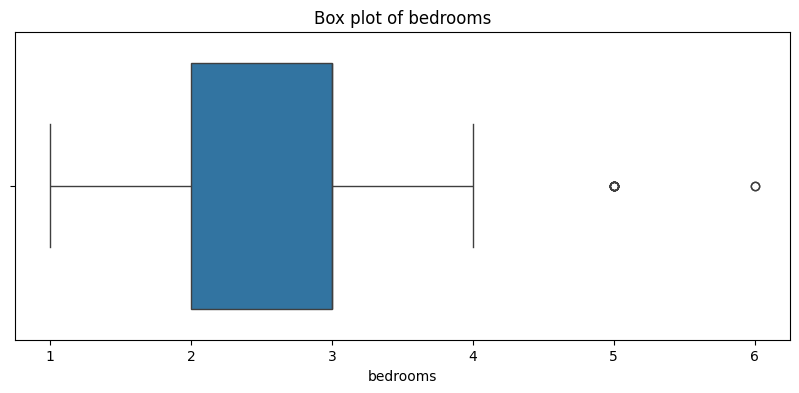

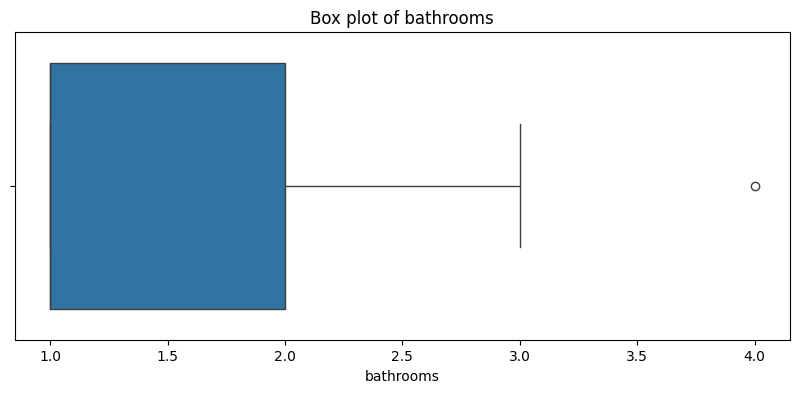

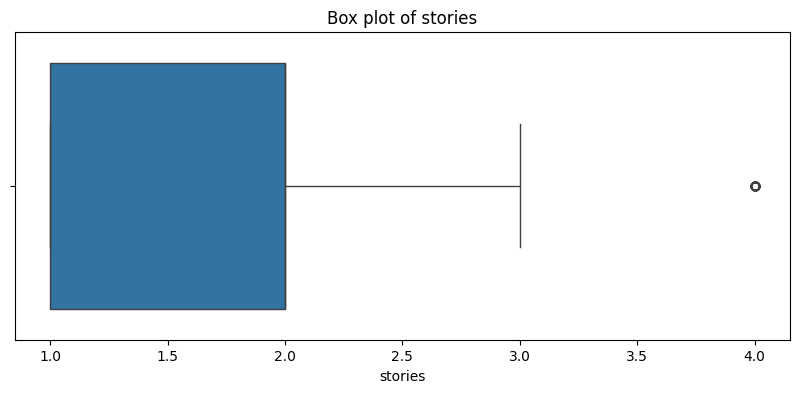

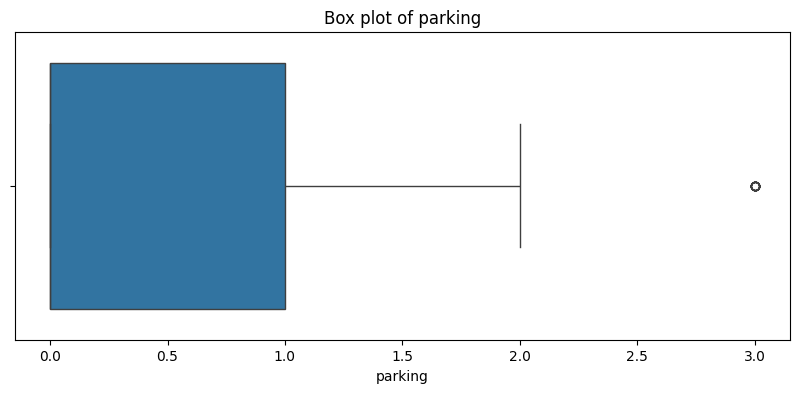

In [ ]:
# Define numeric columns
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Initialize a dictionary to store the number of outliers for each column
outlier_counts = {}

# Detect outliers using the interquartile range (IQR) method
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Iterate over each numeric column
for col in numeric_columns:
    # Identify outliers using IQR for the current column
    outliers_col = ((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col])))

    # Count the number of outliers for the current column
    outlier_counts[col] = outliers_col.sum()

# Print the number of outliers for each column
for col, count in outlier_counts.items():
    print(f"Number of outliers in '{col}': {count}")

# Visualize outliers using box plots
for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()


<ipython-input-13-1e5a3f6e2b7b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


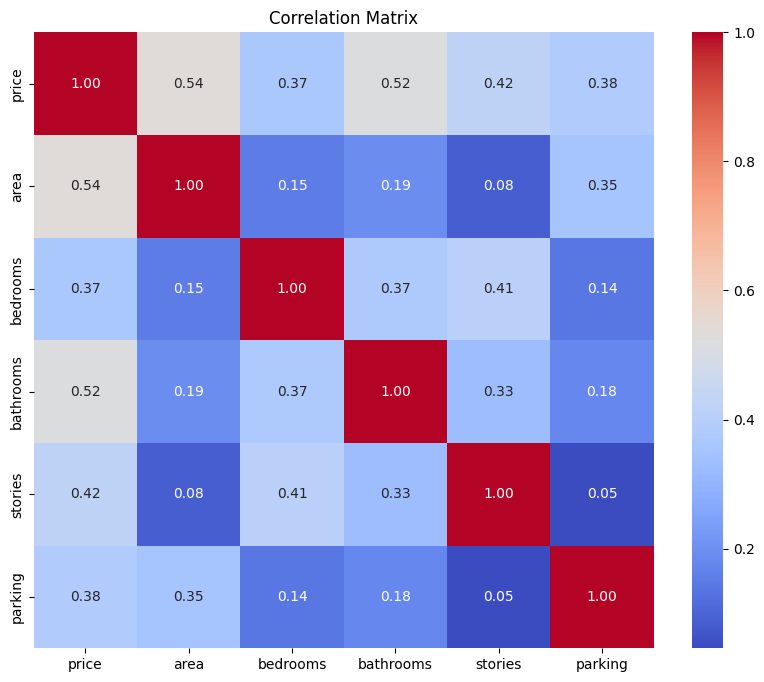

Top correlated features with 'price':
area         0.535997
bathrooms    0.517545
Name: price, dtype: float64


In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Identify features highly correlated with the target variable
target_correlation = correlation_matrix['price'].drop('price')
top_correlated_features = target_correlation[abs(target_correlation) > 0.5].sort_values(ascending=False)
print("Top correlated features with 'price':")
print(top_correlated_features)


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop('price', axis=1)  # Features
y = df['price']                # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (436, 12) (436,)
Testing set shape: (109, 12) (109,)


In [ ]:
# Importing necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Define categorical and numerical columns
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numeric_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Define preprocessing steps for categorical and numerical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by imputing with mean
    ('scaler', StandardScaler())  # Scale numerical variables
])

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
])

# Append RandomForestRegressor to the preprocessing pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

# Train the model on the training data
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking'])])),
                ('regressor', RandomForestRegressor())])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 1035578.1561671762
Root Mean Squared Error (RMSE): 1419425.7469055632
R-squared (R²): 0.6013964881723746


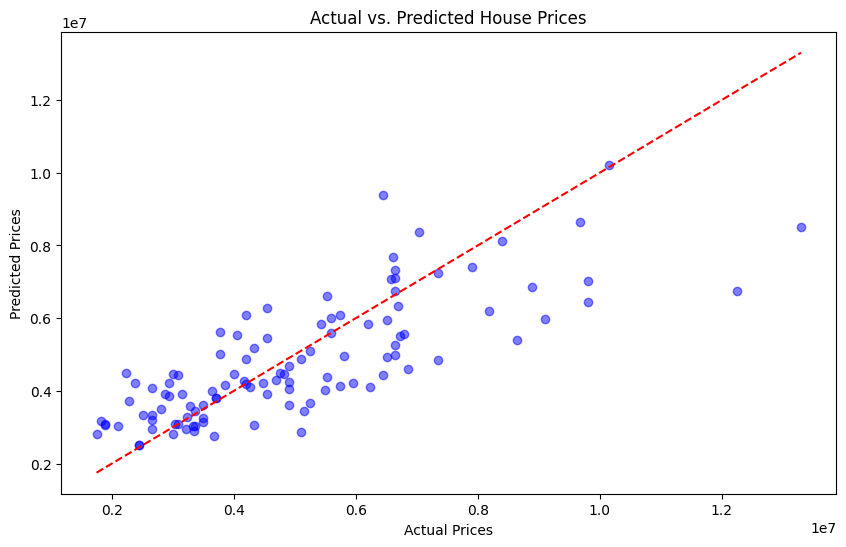

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Plotting the diagonal line
plt.title('Actual vs. Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define categorical and numerical columns
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numeric_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Define preprocessing steps for categorical and numerical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps for both types of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
])

# Define the model
model = RandomForestRegressor()

# Create a pipeline that combines preprocessing and modeling
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Perform k-fold cross-validation (e.g., with 5 folds)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to RMSE scores
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())


Cross-Validation RMSE Scores: [1259294.77676758 1011031.13084489  819362.42763542 1240487.25992973
 1178065.62464422]
Mean RMSE: 1101648.243964369
